In [229]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
import time
%matplotlib inline 

In [72]:
allData = pd.read_csv('tillageTestSummaryResult.csv')
allData.head()

,file,sample,subSample,speed_mph,disk_in,closeDisk,basket,scanStart,roughness,resPercent,resPercentFull
0,T1P1_20191015_102639,1,1,3.0,3,-6,1,1001,39.776414,24.251656,39.040293
1,T1P1_20191015_102639,1,2,3.0,3,-6,1,2318,39.096854,21.980132,38.052096
2,T1P1_20191015_102639,1,3,3.0,3,-6,1,3635,41.104976,14.954588,30.494098
3,T1P1_20191015_102639,1,4,3.0,3,-6,1,4952,42.294506,13.594134,22.838828
4,T1P1_20191015_102639,1,5,3.0,3,-6,1,6269,39.763929,18.002838,32.212047


In [73]:
# Unique data points from each factor
print(f'Speed:{allData.speed_mph.unique()}')
print(f'Front disk:{allData.disk_in.unique()}')
print(f'Closing disk:{allData.closeDisk.unique()}')
print(f'Basket:{allData.basket.unique()}')

Speed:[3.  6.6]
Front disk:[3 5 1 7]
Closing disk:[-6  2  6]
Basket:[1 0]


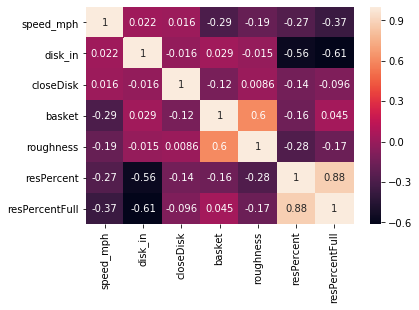

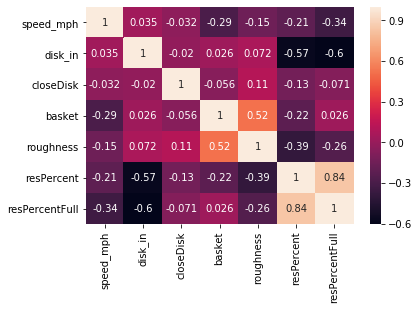

In [36]:
# Find correlation between dependent and independant factors.
dataset=allData[['speed_mph','disk_in','closeDisk','basket','roughness','resPercent','resPercentFull']]
corr1=dataset.corr()
sns.heatmap(corr1, annot=True)
plt.figure()
corr2=dataset.corr(method='spearman') #Utilize spearman method for higher 
sns.heatmap(corr2, annot=True)

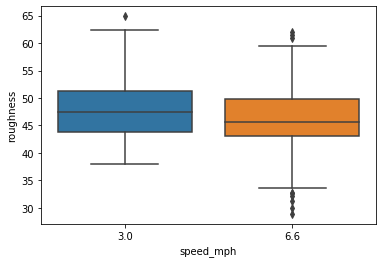

In [4]:
sns.boxplot(x="speed_mph", y="roughness", data=dataset)

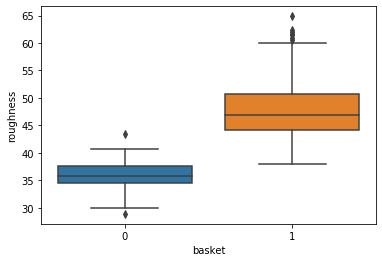

In [5]:
sns.boxplot(x="basket", y="roughness", data=dataset)

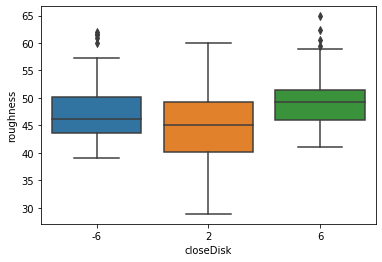

In [6]:
sns.boxplot(x="closeDisk", y="roughness", data=dataset)

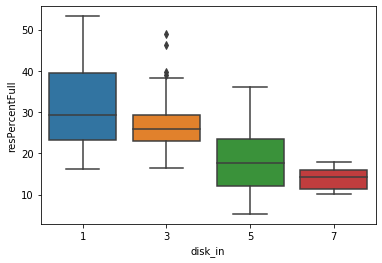

In [204]:
sns.boxplot(x="disk_in", y="resPercentFull", data=dataset)

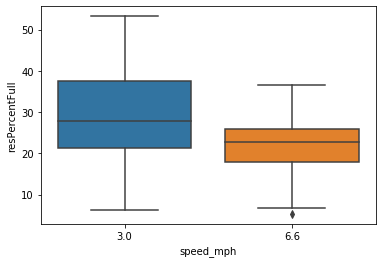

In [205]:
sns.boxplot(x="speed_mph", y="resPercentFull", data=dataset)

In [290]:
def genModels(X,Y):
    
    # Split dataset into Training set and Test set
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.5,random_state=5)
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    # ElasticNet model
    eNet=ElasticNet(random_state=0)
    eNet.fit(X_train,Y_train)
    YNet_pred = eNet.predict(X_test)
    r_2=metrics.r2_score(Y_test,YNet_pred)
    rmse = (np.sqrt(metrics.mean_squared_error(Y_test, YNet_pred)))
    print(f'Enet\t- RMSE: {rmse:.3f}, R^2: {r_2:.3f}, coef: {eNet.coef_}')
    
    # Lasso Model
    las = Lasso(alpha=1)
    las.fit(X_train,Y_train)
    Ylas_pred = las.predict(X_test)
    r_2=metrics.r2_score(Y_test,Ylas_pred)
    rmse = (np.sqrt(metrics.mean_squared_error(Y_test, Ylas_pred)))
    print(f'Lasso\t- RMSE: {rmse:.3f}, R^2: {r_2:.3f}, coef: {las.coef_}')
    
    # Ridge model
    ridge = Ridge(alpha=0.1)
    ridge.fit(X_train,Y_train)
    Yridge_pred = ridge.predict(X_test)
    r_2=metrics.r2_score(Y_test,Yridge_pred)
    rmse = (np.sqrt(metrics.mean_squared_error(Y_test, Yridge_pred)))
    print(f'Ridge\t- RMSE: {rmse:.3f}, R^2: {r_2:.3f}, coef: {ridge.coef_}')
    
    # SVR model
    rbf = svm.SVR(kernel='rbf', C=100, gamma=0.07, epsilon=4.5)
    rbf.fit(X_train,Y_train)
    Yrbf_pred = rbf.predict(X_test)
    r_2=metrics.r2_score(Y_test,Yrbf_pred)
    rmse = (np.sqrt(metrics.mean_squared_error(Y_test, Yrbf_pred)))
    print(f'SVR\t- RMSE: {rmse:.3f}, R^2: {r_2:.3f}')
    
    # linear model 
    lin=LinearRegression()
    lin.fit(X_train,Y_train)
    Ylin_pred = lin.predict(X_test)
    rmse = (np.sqrt(metrics.mean_squared_error(Y_test, Ylin_pred)))
    r_2=metrics.r2_score(Y_test,Ylin_pred)
    print(f'Linear\t- RMSE: {rmse:.3f}, R^2: {r_2:.3f}, coef: {lin.coef_}')

In [291]:
#Function calls
#roughness models with 4 factors
genModels(dataset[['speed_mph','closeDisk','disk_in','basket']], dataset['roughness'])

Enet	- RMSE: 5.020, R^2: 0.327, coef: [-0.         0.        -0.         1.6860028]
Lasso	- RMSE: 4.848, R^2: 0.372, coef: [-0.          0.         -0.          2.02900419]
Ridge	- RMSE: 4.541, R^2: 0.449, coef: [-0.17295786  0.55276735 -0.30955592  3.05233917]
SVR	- RMSE: 4.659, R^2: 0.420
Linear	- RMSE: 4.541, R^2: 0.449, coef: [-0.1726292   0.55322843 -0.30974961  3.05416945]


In [292]:
#roughness models with 2 factors
genModels(dataset[['speed_mph','basket']], dataset['roughness'])

Enet	- RMSE: 5.020, R^2: 0.327, coef: [-0.         1.6860028]
Lasso	- RMSE: 4.848, R^2: 0.372, coef: [-0.          2.02900419]
Ridge	- RMSE: 4.552, R^2: 0.447, coef: [-0.15756373  2.98867132]
SVR	- RMSE: 4.642, R^2: 0.424
Linear	- RMSE: 4.551, R^2: 0.447, coef: [-0.15722323  2.99041527]


In [293]:
#surface residue models with 4 factors
genModels(dataset[['speed_mph','closeDisk','disk_in','basket']], dataset['resPercentFull'])

Enet	- RMSE: 7.865, R^2: 0.388, coef: [-1.78323923 -0.32185292 -2.93684466 -0.        ]
Lasso	- RMSE: 7.429, R^2: 0.454, coef: [-2.20775527 -0.0461331  -3.89081402 -0.        ]
Ridge	- RMSE: 7.045, R^2: 0.509, coef: [-3.37961509 -1.16974769 -4.97975946 -0.81233423]
SVR	- RMSE: 6.336, R^2: 0.603
Linear	- RMSE: 7.045, R^2: 0.509, coef: [-3.38175087 -1.1706461  -4.98261384 -0.81329374]


In [294]:
#surface residue models with 2 factors
genModels(dataset[['speed_mph','disk_in']], dataset['resPercentFull'])

Enet	- RMSE: 7.899, R^2: 0.383, coef: [-1.79240025 -2.91853309]
Lasso	- RMSE: 7.435, R^2: 0.453, coef: [-2.20969652 -3.88689064]
Ridge	- RMSE: 7.060, R^2: 0.507, coef: [-3.23011246 -4.90639515]
SVR	- RMSE: 6.571, R^2: 0.573
Linear	- RMSE: 7.059, R^2: 0.507, coef: [-3.23196723 -4.90916133]
